# Uppgift 1 - uppvärmning covid-19 data

Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att läsa in bladet: "Veckodata Riket" i covid19-filen.
- a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

covid19_file_path = "files/Folkhalsomyndigheten_Covid19.xlsx"
covid19_vaccine_file_path = "files/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"

covid19 = pd.read_excel(covid19_file_path, sheet_name="Veckodata Riket")

covid19.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              90 non-null     int64  
 1   veckonummer                     90 non-null     int64  
 2   Antal_fall_vecka                90 non-null     int64  
 3   Antal_fall_100000inv_vecka      90 non-null     int64  
 4   Antal_fall_100000inv_14dagar    90 non-null     int64  
 5   Kum_antal_fall                  90 non-null     int64  
 6   Kum_fall_100000inv              90 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  90 non-null     int64  
 8   Kum_antal_intensivvårdade       90 non-null     int64  
 9   Antal_avlidna_vecka             90 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    90 non-null     float64
 11  Kum_antal_avlidna               90 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      90 non

In [3]:
covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [4]:
covid19.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
85,2021,38,4307,41,101,1150068,11080,21,7844,40,3.9,14849,1430.599976
86,2021,39,4240,41,82,1154308,11121,17,7861,38,3.7,14887,1434.300049
87,2021,40,4140,40,81,1158448,11161,15,7876,49,4.7,14936,1439.000000
88,2021,41,4074,39,79,1162522,11200,13,7889,28,2.7,14964,1441.699951
89,2021,42,5201,50,89,1167723,11251,11,7900,16,1.5,14980,1443.300049



- b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" .



In [5]:
covid19["år"] = covid19["år"].astype(str)
covid19["veckonummer"] = covid19["veckonummer"].astype(str)

covid19["år"] = covid19["år"] + "v" + covid19["veckonummer"]
covid19 = covid19.drop(columns=["veckonummer"])

covid19 = covid19.rename(columns={"år": "Vecka"})

covid19

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021v38,4307,41,101,1150068,11080,21,7844,40,3.9,14849,1430.599976
86,2021v39,4240,41,82,1154308,11121,17,7861,38,3.7,14887,1434.300049
87,2021v40,4140,40,81,1158448,11161,15,7876,49,4.7,14936,1439.000000
88,2021v41,4074,39,79,1162522,11200,13,7889,28,2.7,14964,1441.699951


För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2 grid med graferna.
- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu. 


In [6]:
fig = px.line(covid19, x="Vecka", y="Antal_avlidna_vecka", title='Death cases caused by Covid19')
fig.show()

- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.


In [7]:
fig = px.line(covid19, x="Vecka", y="Antal_fall_vecka", title='New Covid19 cases per week')
fig.show()

- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


In [8]:
fig = px.line(covid19, x="Vecka", y=["Antal_fall_vecka","Antal_avlidna_vecka"], title='New Covid19 cases per week')

fig.show()

- f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

In [9]:
fig = px.line(covid19, x="Vecka", y="Kum_antal_fall", title='Accumulated weekly new cases of Covid19')

fig.show()

In [10]:
covid19[["Antal_avlidna_vecka","Antal_fall_vecka"]]

,Antal_avlidna_vecka,Antal_fall_vecka
0,0,1
1,0,0
2,0,0
3,0,13
4,0,211
...,...,...
85,40,4307
86,38,4240
87,49,4140
88,28,4074


<AxesSubplot:xlabel='Vecka', ylabel='Kum_antal_fall'>

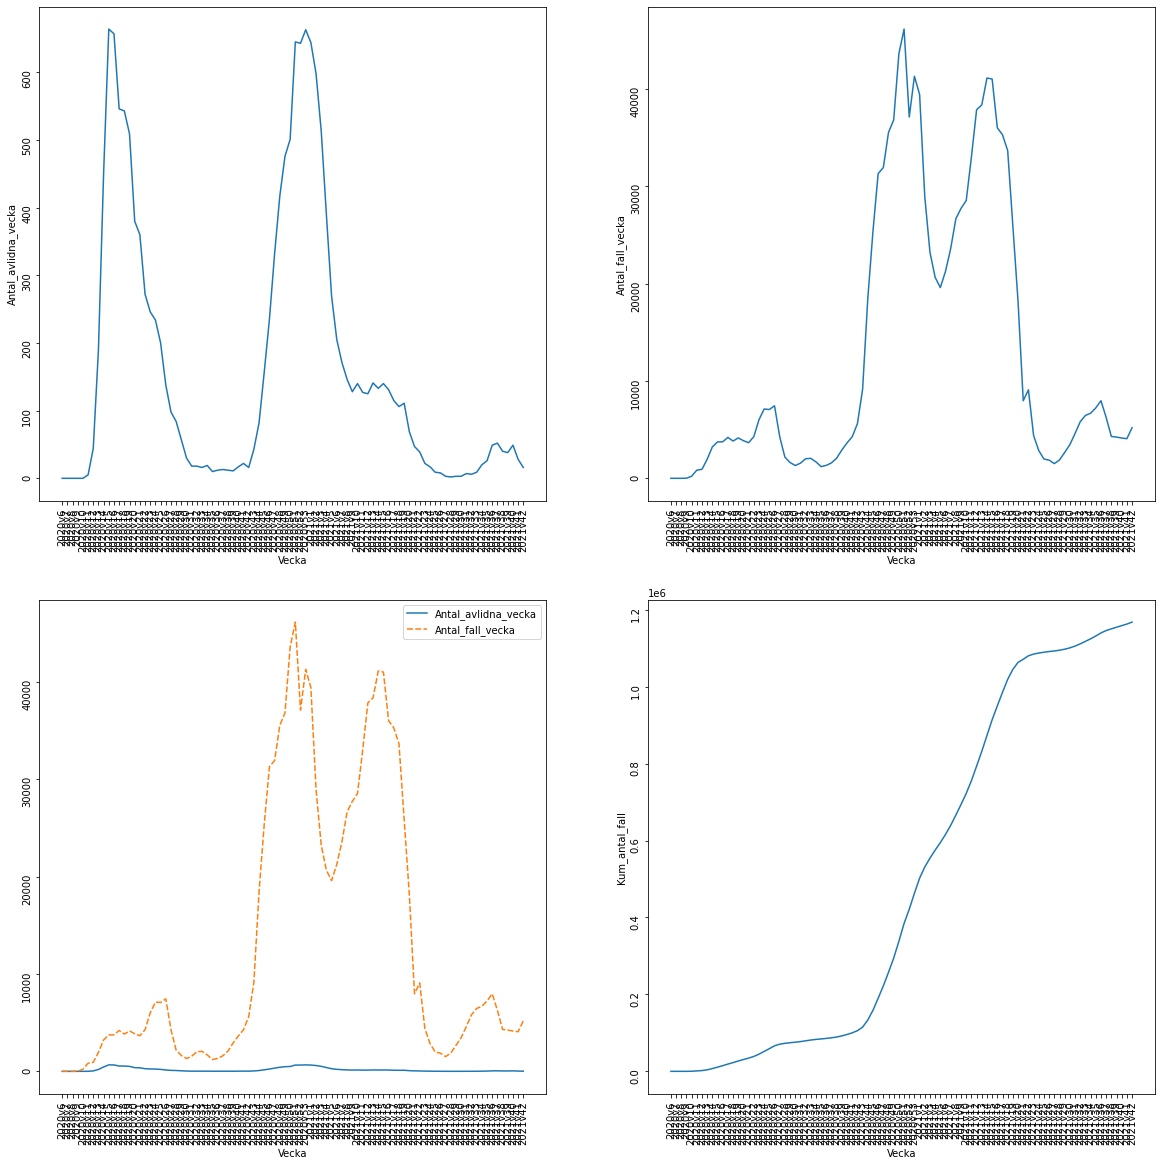

In [11]:
# drawing everything with seaborn

fig, ax = plt.subplots(2,2 , figsize=(20,20))

for i in [0,1]:
    for j in [0,1]:
        ax[i][j].tick_params(rotation=90)

sns.lineplot(ax=ax[0,0], data =covid19 , x="Vecka", y="Antal_avlidna_vecka")
sns.lineplot(ax=ax[0,1], data =covid19 , x="Vecka", y="Antal_fall_vecka")
sns.lineplot(ax=ax[1,0], data =covid19[["Vecka","Antal_avlidna_vecka","Antal_fall_vecka"]].set_index("Vecka",drop=True) )
sns.lineplot(ax=ax[1,1], data =covid19 , x="Vecka", y="Kum_antal_fall")


<AxesSubplot:xlabel='Vecka'>

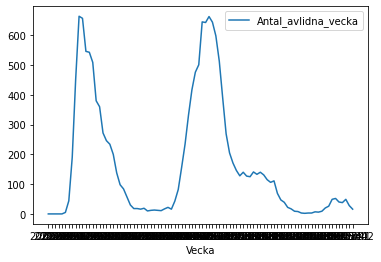

In [12]:
sns.lineplot(data=covid19[["Vecka","Antal_avlidna_vecka"]].set_index("Vecka",drop=True) )



# Uppgift 2 - uppvärmning vaccindata
I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder. Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
- a) Hur många län finns representerade i datasetet?

In [20]:
vaccin = pd.read_excel(covid19_vaccine_file_path, sheet_name=  "Vaccinerade kommun och ålder")

print(f" Det finns {vaccin['Län_namn'].unique().__len__()} län i datasetet")

 Det finns 21 län i datasetet


- b) Hur många kommuner finns representerade i datasetet?

In [22]:

antal_kommuner = vaccin['Kommun_namn'].unique().__len__()

print(f" Det finns {antal_kommuner} kommuner i datasetet")

 Det finns 290 kommuner i datasetet


- c) Hur stor är befolkningen som är representerad i datasetet?

In [25]:
befolkningen = vaccin["Befolkning"].sum()

print(f"Det är en befolkning av {befolkningen} personer")

Det är en befolkning av 8541497 personer


- d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.

In [28]:
sweden_pop = 10409248 

print(f"Det finns {sweden_pop - befolkningen} barn under 16 år i Sverige")

Det finns 1867751 barn under 16 år i Sverige


- e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

In [92]:
fig = px.histogram(data_frame=vaccin,x="Län_namn",y=["Andel minst 1 dos","Andel färdigvaccinerade"])

fig.show()

In [30]:
vaccin

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,677,484,0.603387,0.431373
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4195,3413,0.652614,0.530958
2,1,Stockholm,114,Upplands Väsby,30-39,7088,5004,4425,0.705982,0.624295
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5329,5030,0.783446,0.739488
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5363,5210,0.867098,0.842361
...,...,...,...,...,...,...,...,...,...,...
2605,25,Norrbotten,2584,Kiruna,50-59,3134,2916,2862,0.930440,0.913210
2606,25,Norrbotten,2584,Kiruna,60-69,2768,2596,2542,0.937861,0.918353
2607,25,Norrbotten,2584,Kiruna,70-79,2287,2159,2095,0.944031,0.916047
2608,25,Norrbotten,2584,Kiruna,80-89,1280,1233,1192,0.963281,0.931250


- f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal
färdigvaccinerade.

In [35]:
vaccin_older_than_16 = vaccin[vaccin["Ålder"]!="16-17"]

fig = px.histogram(data_frame=vaccin_older_than_16,x="Län_namn",y=["Antal minst 1 dos","Antal färdigvaccinerade"])

fig.show()

# Uppgift 3 - KPIer & explorativ dataanalys

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla visualiseringar.

### KPI's : 
Since we can't use the same indicators as what we already worked with in the tasks above, the most interesting KPIs in my opinion would be :

- Total Vaccinated with 1st dose
- Total Vaccinated with 2nd dose

- Vaccinations performed every week

- Patients sitting in intensive care

In [102]:
vaccinerade_by_time = pd.read_excel(covid19_vaccine_file_path, sheet_name="Vaccinerade tidsserie")

vaccinerade_1_dos = vaccinerade_by_time[vaccinerade_by_time["Vaccinationsstatus"]=="Minst 1 dos"].drop(columns=["Vaccinationsstatus","Andel vaccinerade"])
vaccinerade_2_dos = vaccinerade_by_time[vaccinerade_by_time["Vaccinationsstatus"]=="Färdigvaccinerade"].drop(columns=["Vaccinationsstatus","Andel vaccinerade"])

vaccinerade_1_dos = vaccinerade_1_dos[vaccinerade_1_dos["Region"]=="| Sverige |"].drop(columns=["Region"])
vaccinerade_2_dos = vaccinerade_2_dos[vaccinerade_2_dos["Region"]=="| Sverige |"].drop(columns=["Region"])

vaccinerade_1_dos["Vecka"] = vaccinerade_1_dos["År"].astype(str) + "v" + vaccinerade_1_dos["Vecka"].astype(str)
vaccinerade_2_dos["Vecka"] = vaccinerade_2_dos["År"].astype(str) + "v" + vaccinerade_2_dos["Vecka"].astype(str)

vaccinerade_1_dos = vaccinerade_1_dos.drop(columns="År").rename(columns={"Antal vaccinerade":"1st dose"})
vaccinerade_2_dos = vaccinerade_2_dos.drop(columns="År").rename(columns={"Antal vaccinerade":"2nd dose"})

vaccinerade = pd.concat([vaccinerade_1_dos.set_index("Vecka"),vaccinerade_2_dos.set_index("Vecka")], axis="columns")

fig = px.line(data_frame=vaccinerade, labels={"variable":"Variable","value":"Value","Vecka":"Week"})
fig.show()

In [128]:
# Vaccinations performed everyweek

vaccionation_per_week = pd.read_excel(covid19_vaccine_file_path, sheet_name="Vaccinationer tidsserie")

vaccionation_per_week = vaccionation_per_week[vaccionation_per_week["Region"]=="| Sverige |"].drop(columns="Region")

vaccionation_per_week["Vecka"] = vaccionation_per_week["År"].astype(str) + "v" +vaccionation_per_week["Vecka"].astype(str)

vaccionation_per_week = vaccionation_per_week.reset_index(drop=True)

new_values = [vaccionation_per_week["Antal vaccinationer"][0]]

for i in range(1,len(vaccionation_per_week)):
    new_values.append(vaccionation_per_week["Antal vaccinationer"][i]-vaccionation_per_week["Antal vaccinationer"][i-1])
    
vaccionation_per_week = vaccionation_per_week.drop(columns="År")
vaccionation_per_week["Antal vaccinationer vecka"] = new_values


fig = px.line(data_frame=vaccionation_per_week, x = "Vecka", y="Antal vaccinationer vecka")

fig.show()

In [100]:
# Patients sitting in the intensive care units 

fig = px.line(data_frame=covid19, x="Vecka",y="Antal_nyaintensivvårdade_vecka", labels={"Antal_nyaintensivvårdade_vecka":"Antal nya intensivvårdade per vecka"})



fig.show()